In [347]:
import pandas as pd
import numpy as np
import plotly.express as px

In [348]:
data = pd.read_csv('/Volumes/Apple/Data collecction/Netflix Pr.csv')

In [349]:
data.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9161.0,NaN
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.4,7988.0,NaN
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2376341.0,NaN
3,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1248068.0,NaN
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,526826.0,NaN


In [350]:
data.shape

(21713, 8)

In [351]:
data.isnull().sum()

title                   717
type                      0
genres                  367
releaseYear              40
imdbId                 1627
imdbAverageRating      1824
imdbNumVotes           1824
availableCountries    21553
dtype: int64

In [352]:
data = data.drop('availableCountries', axis=1)

In [353]:
data.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9161.0
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.4,7988.0
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2376341.0
3,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1248068.0
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,526826.0


In [354]:
data.dtypes

title                 object
type                  object
genres                object
releaseYear          float64
imdbId                object
imdbAverageRating    float64
imdbNumVotes         float64
dtype: object

In [355]:
data = data.dropna()

In [356]:
data.isnull().sum()

title                0
type                 0
genres               0
releaseYear          0
imdbId               0
imdbAverageRating    0
imdbNumVotes         0
dtype: int64

In [357]:
data.shape

(19888, 7)

In [358]:
data['releaseYear'] = data['releaseYear'].astype('Int64')

In [359]:
data.dtypes

title                 object
type                  object
genres                object
releaseYear            Int64
imdbId                object
imdbAverageRating    float64
imdbNumVotes         float64
dtype: object

In [360]:
movie_per_year = data['releaseYear'].value_counts().reset_index()

In [361]:
movie_per_year

,releaseYear,count
0,2022,1831
1,2023,1674
2,2021,1421
3,2019,1398
4,2018,1369
...,...,...
101,1918,1
102,1926,1
103,1913,1
104,1930,1


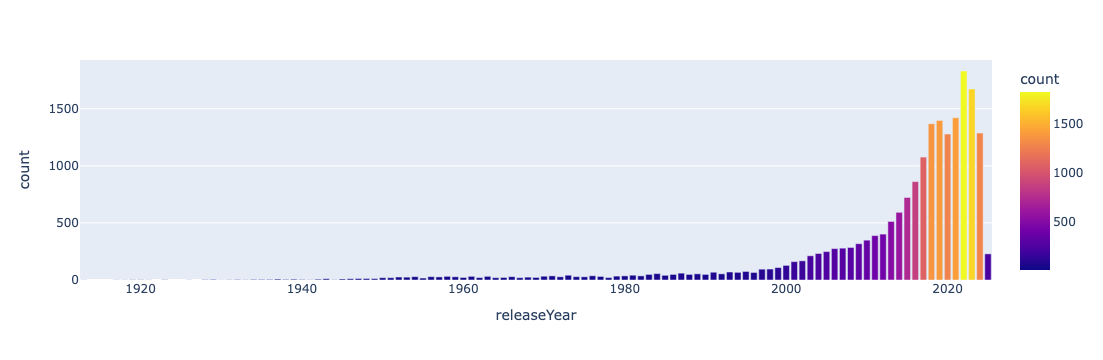

In [412]:
fig = px.bar(movie_per_year, x='releaseYear', y='count', color='count')
fig.show()

In [363]:
data['type'].unique()


array(['movie', 'tv'], dtype=object)

In [364]:
#number of show per show_type
number_show_per_type = data['type'].value_counts().reset_index()

In [365]:
number_show_per_type

,type,count
0,movie,15349
1,tv,4539


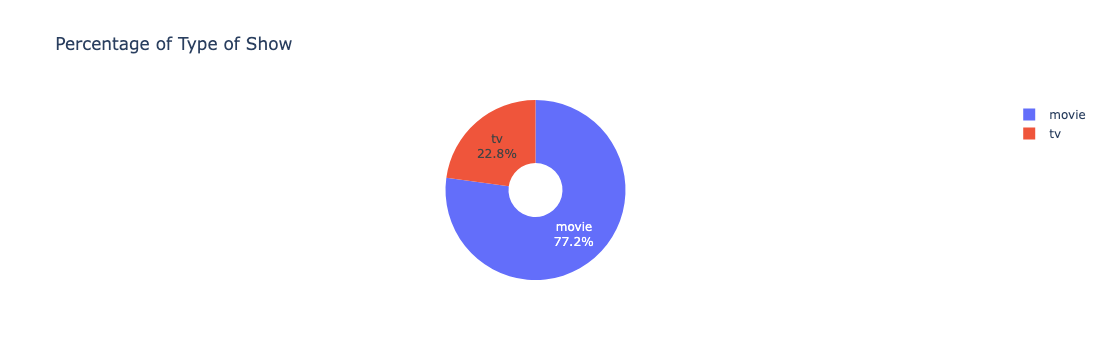

In [414]:
fig = px.pie(number_show_per_type, values='count', names='type', hole=0.3, title='Percentage of Type of Show')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig.show()


In [367]:
# number of movies per rating
count_of_movies_per_rating = data['imdbAverageRating'].value_counts().reset_index()

In [368]:
count_of_movies_per_rating

,imdbAverageRating,count
0,6.6,809
1,6.4,807
2,6.3,805
3,6.5,791
4,6.7,788
...,...,...
78,1.2,2
79,1.4,2
80,1.5,1
81,9.8,1


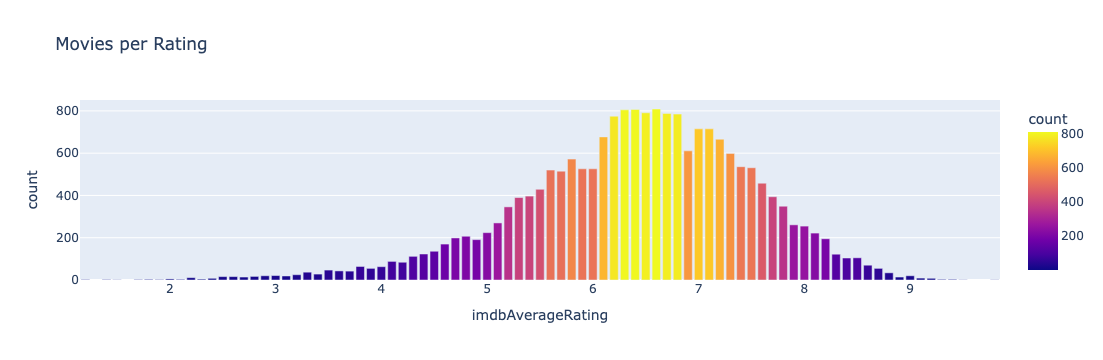

In [369]:
fig = px.bar(count_of_movies_per_rating, x='imdbAverageRating', y='count', title='Movies per Rating', color='count')
fig.show()

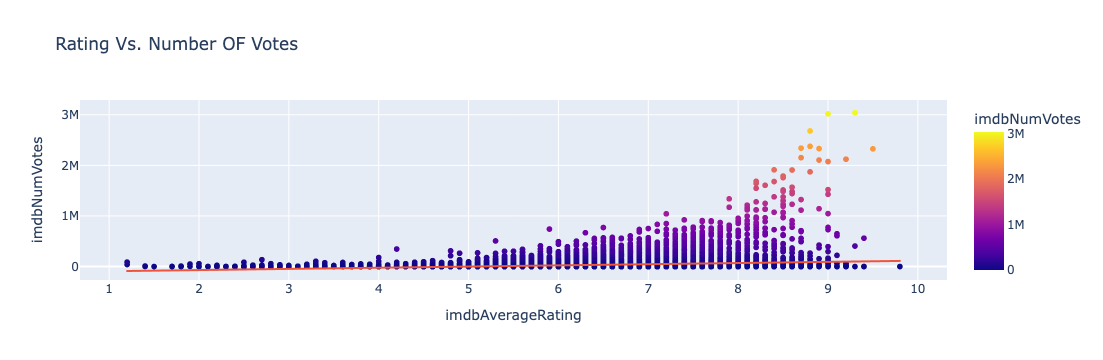

In [370]:
# checking relation between 'rating'&'number of Votes'
fig = px.scatter(data, x='imdbAverageRating', y='imdbNumVotes', color='imdbNumVotes', trendline='ols', title='Rating Vs. Number OF Votes')
fig.show()

In [371]:
data['genres'] = data['genres'].str.split(', ')


In [372]:
exploed_data = data.explode('genres')

In [373]:
#number of movies per genre

movies_per_genre = exploed_data['genres'].value_counts().reset_index()
movies_per_genre

,genres,count
0,Drama,9588
1,Comedy,7323
2,Action,3453
3,Crime,3042
4,Romance,2980
5,Adventure,2456
6,Thriller,2080
7,Animation,1966
8,Documentary,1963
9,Mystery,1426


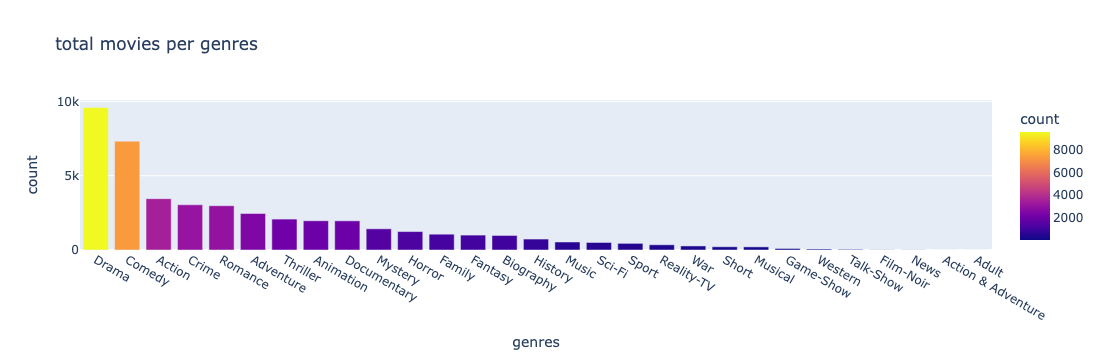

In [416]:
fig = px.bar(movies_per_genre, x='genres', y='count', title='total movies per genres', color='count')
fig.show()

In [375]:
# average rating per genres
avg_rating_genre = exploed_data.groupby('genres')['imdbAverageRating'].mean().reset_index()
avg_rating_genre

,genres,imdbAverageRating
0,Action,6.358616
1,Action & Adventure,7.200000
2,Adult,6.500000
3,Adventure,6.438844
4,Animation,6.798474
5,Biography,6.931423
6,Comedy,6.213314
7,Crime,6.504964
8,Documentary,6.936271
9,Drama,6.581404


In [376]:
# top twenty higest rating movies
top_20_highest_rating_movie = data[data['imdbNumVotes'] > 10000].sort_values(by='imdbAverageRating', ascending=False).head(20)
top_20_highest_rating_movie

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes
16447,Breaking Bad,tv,"[Crime, Drama, Thriller]",2008,tt0903747,9.5,2326332.0
16518,Band of Brothers,tv,"[Action, Drama, History]",2001,tt0185906,9.4,561101.0
16421,Avatar: The Last Airbender,tv,"[Action, Adventure, Animation]",2005,tt0417299,9.3,405407.0
80,The Shawshank Redemption,movie,[Drama],1994,tt0111161,9.3,3040472.0
16379,One Piece Fan Letter,movie,"[Action, Adventure, Animation]",2024,tt33998607,9.2,19507.0
16401,One Piece Fan Letter,movie,"[Action, Adventure, Animation]",2024,tt33998607,9.2,19507.0
18125,Our Planet,tv,[Documentary],2019,tt9253866,9.2,56652.0
71,The Godfather,movie,"[Crime, Drama]",1972,tt0068646,9.2,2122342.0
20544,When Life Gives You Tangerines,tv,"[Drama, History, Romance]",2025,tt26471411,9.2,16465.0
16457,Attack on Titan,tv,"[Action, Adventure, Animation]",2013,tt2560140,9.1,607953.0


In [377]:
# Genre Popularity Over Time 

genre_popularity = exploed_data.groupby(['releaseYear','genres']).size().reset_index(name='count')
genre_popularity

,releaseYear,genres,count
0,1913,Drama,1
1,1917,Drama,1
2,1917,War,1
3,1918,Drama,1
4,1919,Drama,2
...,...,...,...
1578,2025,Sport,12
1579,2025,Talk-Show,2
1580,2025,Thriller,22
1581,2025,War,1


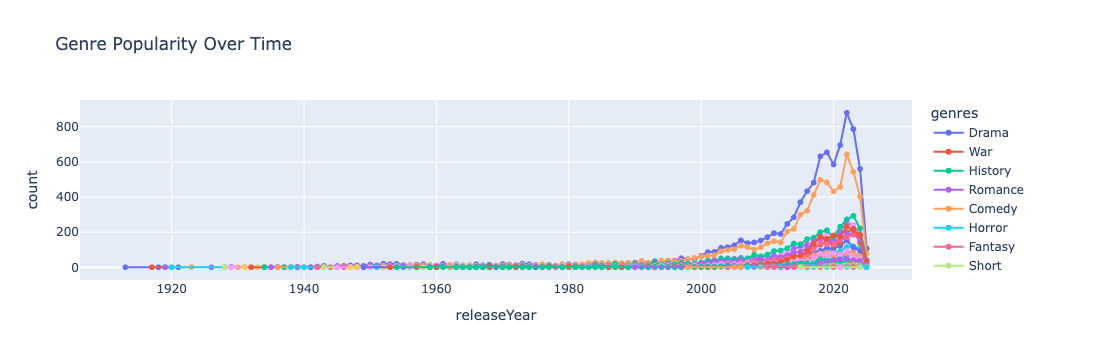

In [420]:
fig = px.line(genre_popularity, x='releaseYear', y='count', color='genres',
              title='Genre Popularity Over Time',
              markers=True)
fig.show()